In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# About this file

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [3]:
df.shape

(20640, 10)

In [4]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

There are 4 types of categories in `ocean_proximity` and houses near Island are very less as compared to others

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


# Here we can see that - 

1. The minimum price for a House is 14999$ and maximum price for house is 500001.
2. The minimum age of a House is 1 year and maximum age of house is 52 years.


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In `total_bedrooms` we have 207 null values

# EDA

## 1. Missing values

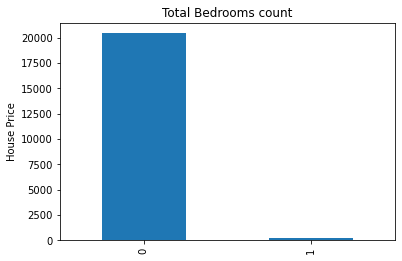

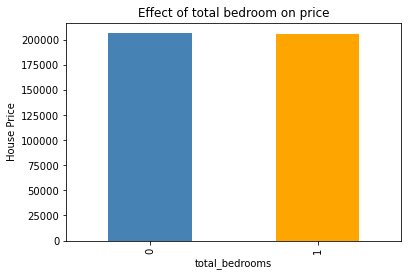

In [8]:
# checking count and relationship of null values and target value
df1 = df.copy()

df1['total_bedrooms'] = np.where(df['total_bedrooms'].isna(),1,0)
df1['total_bedrooms'].value_counts().plot.bar()
plt.ylabel('House Price')
plt.title('Total Bedrooms count')
plt.show()

df1.groupby('total_bedrooms')['median_house_value'].mean().plot.bar(color = ['steelblue','orange'])
plt.ylabel('House Price')
plt.title('Effect of total bedroom on price')
plt.show()

Here we can see that the missing value is very less but it is contributing in increase house price. So, leaving for now

## 2. Numerical Variables

In [9]:
df1 = df.copy()
numerical_features = df1.select_dtypes(exclude='O').columns
numerical_features

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

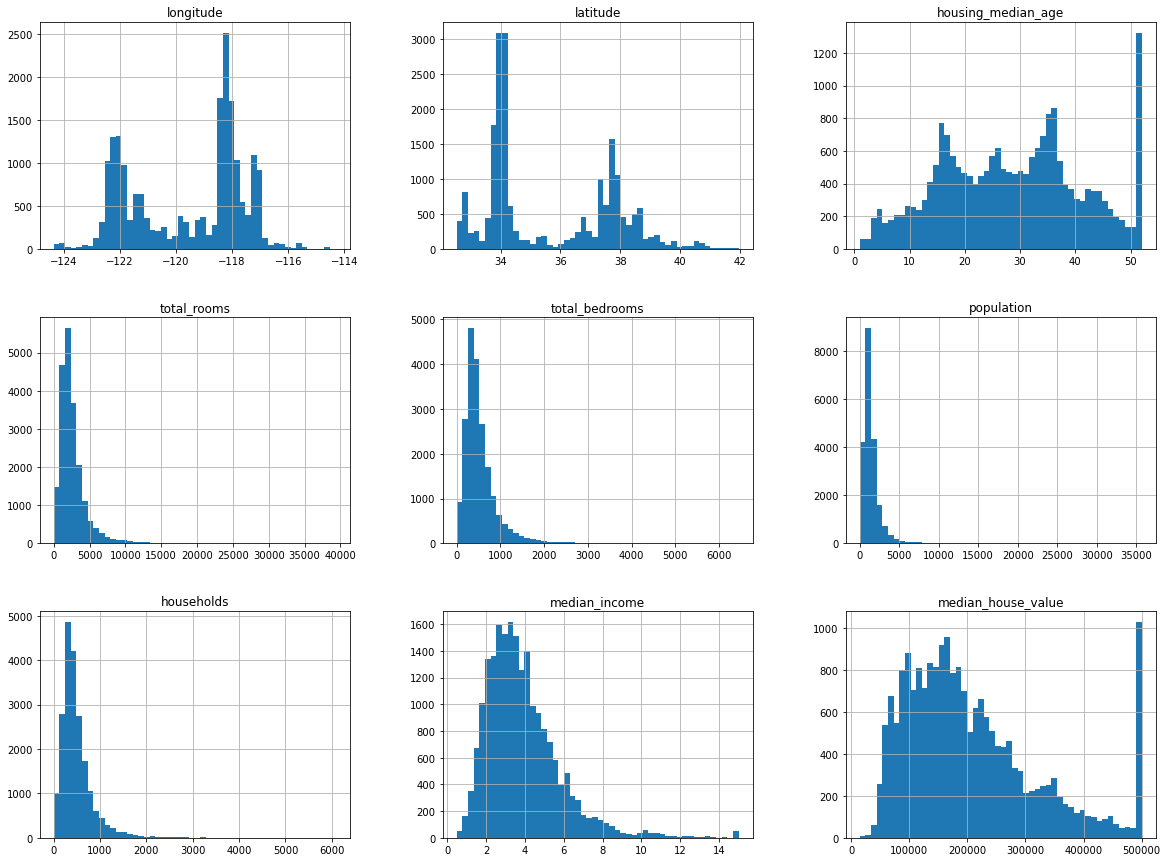

In [10]:
df1[numerical_features].hist(bins=50,figsize=(20,15))
plt.show()

# Observation

1. Most of the houses are 2-50 years old. Only few of them are more than 50 years old
2. Most of the house ranges between 15-50 thousand dollar. Only few of them are more than 500000$.
3. Total rooms in block ranges from 0-5000. Few of them have more than 5000 rooms.
4. Total bedrooms in block ranges from 0-1000-2000(some). Few of them have more than 2000.
5. Total people in a block ranges from 0-5000. Few blocks have more than 5000 people.
6. Median_income is somewhat normally distributed.

My Hypothesis - People with more income will have Expensive Houses

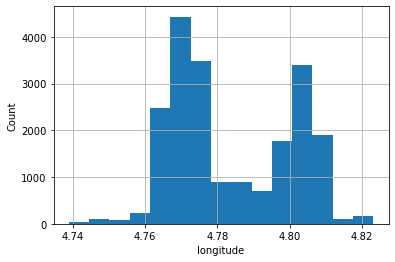

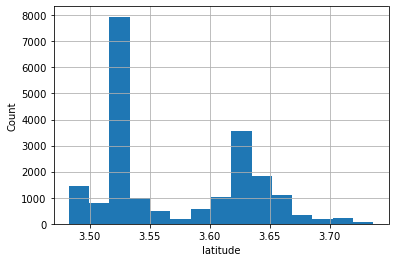

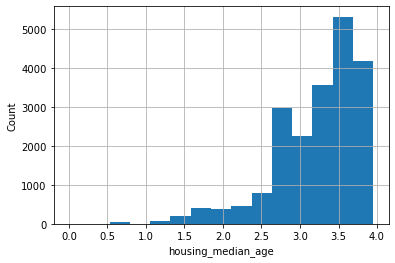

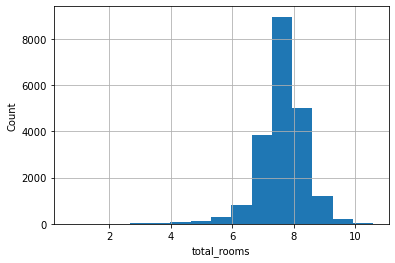

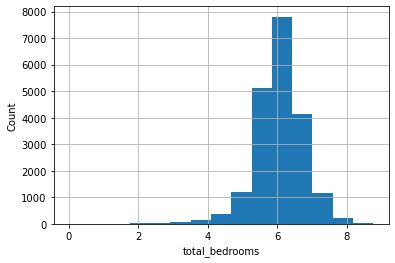

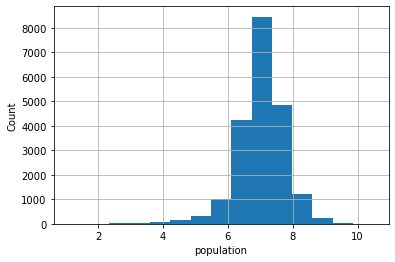

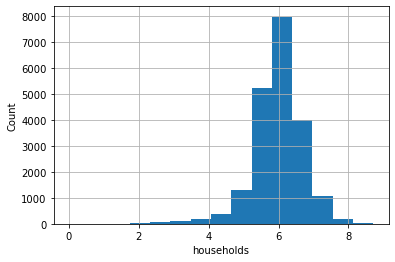

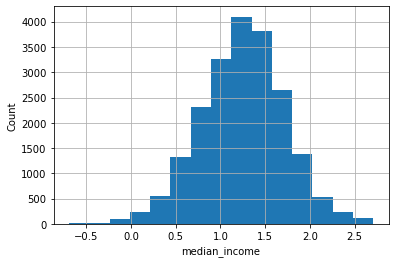

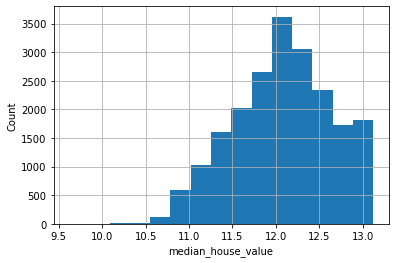

In [11]:
# Taking log to see if the distribution is getting normal or not

df1 = df.copy()
df1['longitude'] = abs(df['longitude'])
for features in numerical_features:
    if 0 in df1[features].unique(): # because log 0 is infinity
        pass
    else:
        df1[features] = np.log(df1[features])
        df1[features].hist(bins=15)
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.show()
        

# Relation of numerical variable with Target Variable

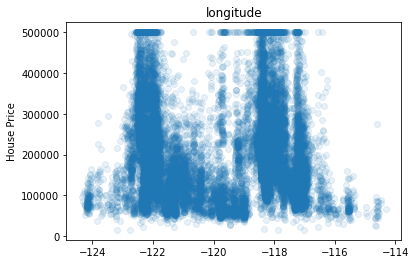

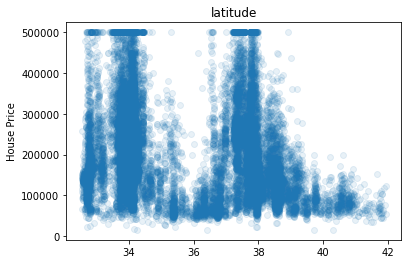

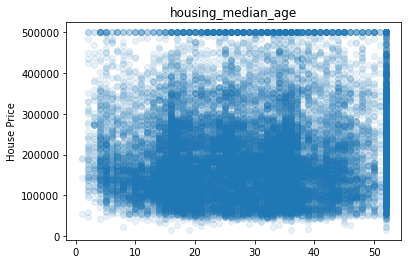

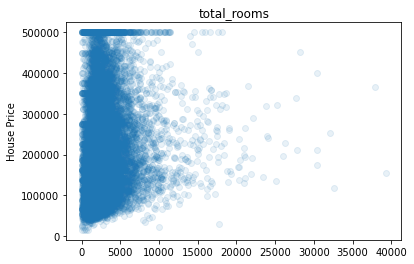

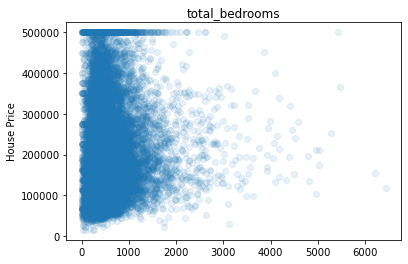

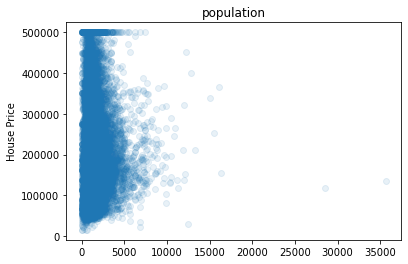

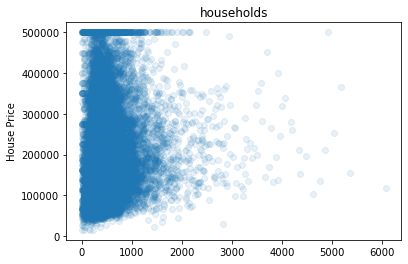

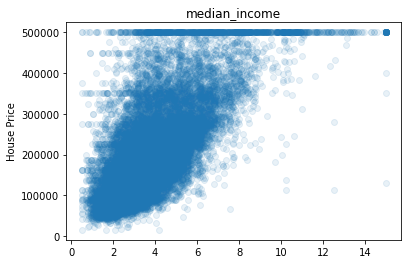

In [12]:
df1 = df.copy()
for features in numerical_features:
    if features != 'median_house_value':
        plt.scatter(x = df1[features],y = df['median_house_value'],alpha=0.1)
        plt.title(features)
        plt.ylabel('House Price')
        plt.show()

Higher income people have bought higher value houses but there are outliers also.

I think my hypothesis is right

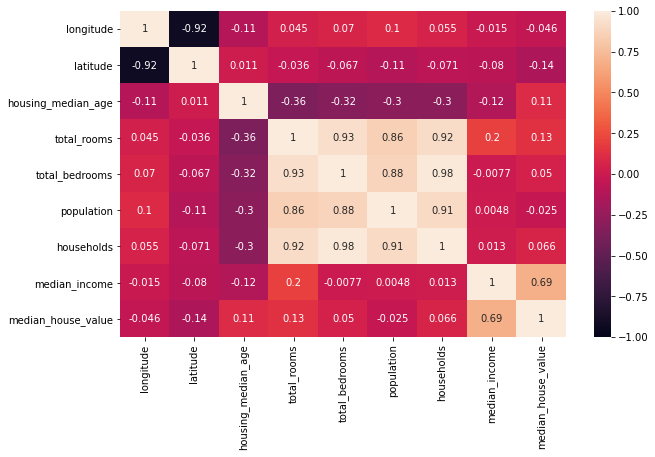

In [13]:
# Checking correlation between features
df1 = df.copy()
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

# Observation

1. `Latitude` and `Longitude` are highly negatively correlated
2. `total_rooms` and `total_bedrooms` are higly correlated
3. `total_rooms` and `household` are highly correlated
4. `total_bedrooms` and `household` are higly correlated
5. `Population` and `household` are correlated

# Checking the relation of highly correlated features

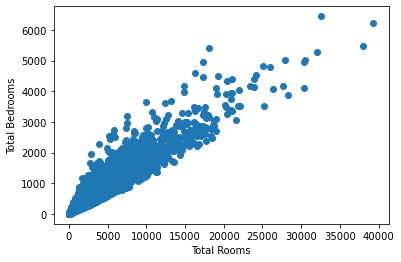

In [14]:
#checking the relation
plt.scatter(df['total_rooms'],df['total_bedrooms'])
plt.xlabel('Total Rooms')
plt.ylabel('Total Bedrooms')
plt.show()

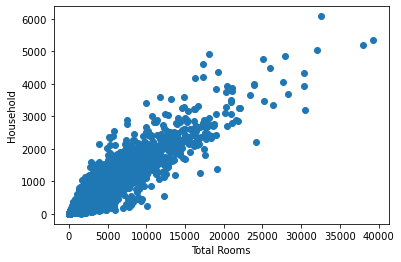

In [15]:
#checking the relation
plt.scatter(df['total_rooms'],df['households'])
plt.xlabel('Total Rooms')
plt.ylabel('Household')
plt.show()

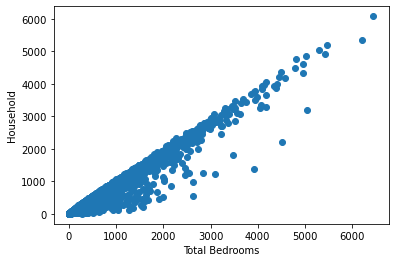

In [16]:
#checking the relation
plt.scatter(df['total_bedrooms'],df['households'])
plt.xlabel('Total Bedrooms')
plt.ylabel('Household')
plt.show()

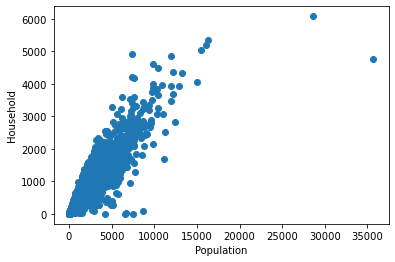

In [17]:
#checking the relation
plt.scatter(df['population'],df['households'])
plt.xlabel('Population')
plt.ylabel('Household')
plt.show()

I will drop one column from above in feature engineering if required because they give almost similar results.

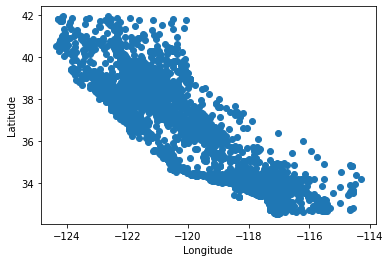

In [18]:
#checking the relation
plt.scatter(df['longitude'],df['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

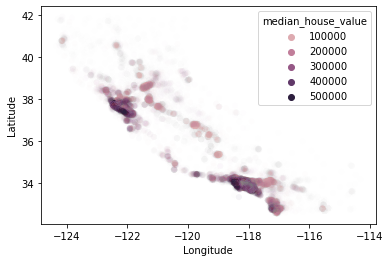

In [19]:
sns.scatterplot(x = 'longitude',y = 'latitude',hue= 'median_house_value',data = df1,alpha=0.01)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The Expensive houses are located at those altitudes where there is darker shade

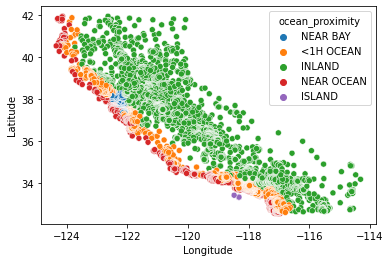

In [20]:
sns.scatterplot(x = 'longitude',y = 'latitude',hue= 'ocean_proximity',data = df1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

We have seen the expensive houses are located at that altitudes.

Meaning that, the houses which have ocean proximity of `1H ocean`,`near ocean`,`near bay` and `island`(most) are more Expensive.

`Inland` is for general public and is least expensive

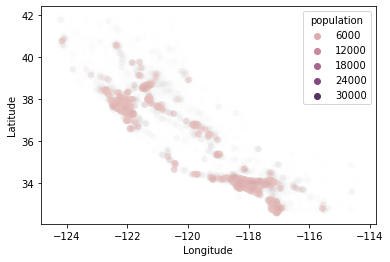

In [21]:
sns.scatterplot(x = 'longitude',y = 'latitude',hue= 'population',data = df1,alpha=0.01)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

More people are living in that area. This means either -  

1. People are not caring whether the house is expensive or not, they just want their houses near the ocean.
2. More people are rich

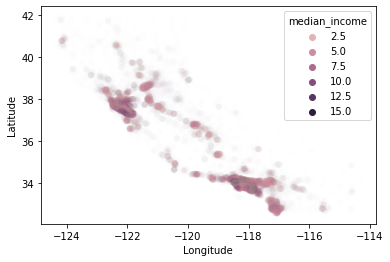

In [22]:
sns.scatterplot(x = 'longitude',y = 'latitude',hue= 'median_income',data = df1,alpha=0.01)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

hypothesis was correct that more people are rich and also they want their houses near the ocean

# 3. Categorical Variables

In [23]:
df['ocean_proximity']

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

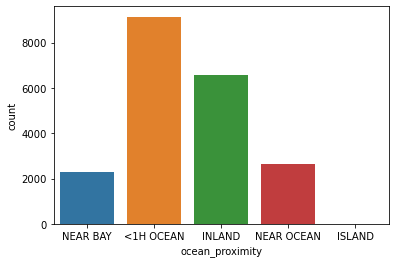

In [24]:
sns.countplot(x = 'ocean_proximity',data = df)

There are more houses near 1H Ocean 

<AxesSubplot:xlabel='ocean_proximity'>

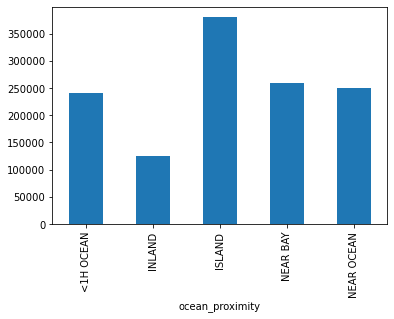

In [25]:
df.groupby('ocean_proximity')['median_house_value'].mean().plot(kind='bar')

1. The houses which are near to Island are most expensive
2. The houses which are near from Inland are cheaper than others. 

In [26]:
features_count = {features:len(df[features].unique()) for features in df}
features_count

{'longitude': 844,
 'latitude': 862,
 'housing_median_age': 52,
 'total_rooms': 5926,
 'total_bedrooms': 1924,
 'population': 3888,
 'households': 1815,
 'median_income': 12928,
 'median_house_value': 3842,
 'ocean_proximity': 5}

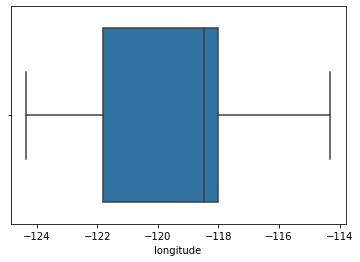

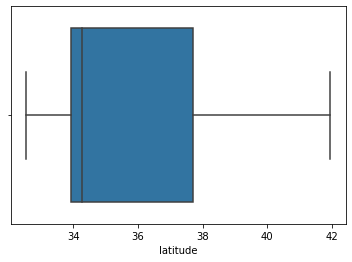

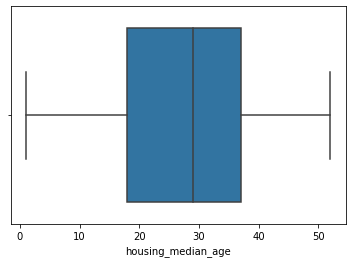

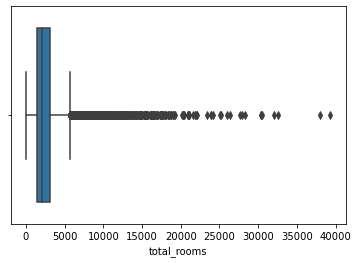

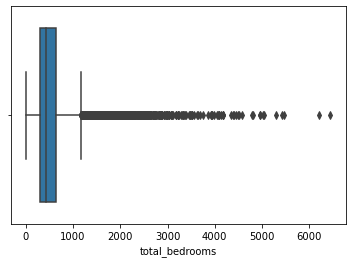

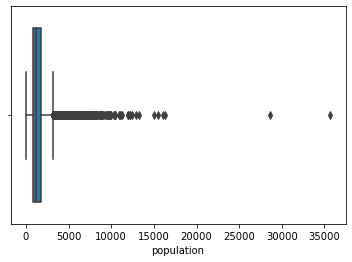

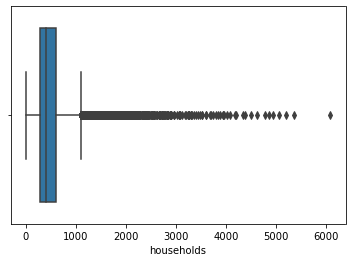

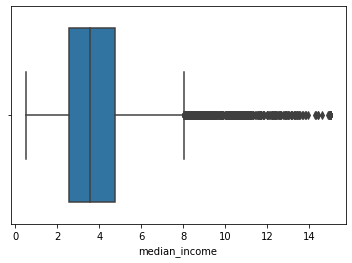

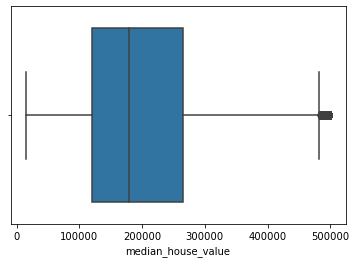

In [27]:
df1 = df.copy()
for features in df1:
    if features != 'ocean_proximity':
        sns.boxplot(x = features,  data=df1)
        plt.show()

# Observation

1. In `total_rooms`, after 5000 there are so many outliers
2. In `total_bedrooms`, after 1100 there are outliers.
3. In `population`, after 3000 there are outliers.
4. In `households`, after 1100 there are outliers.
5. In `median_income`, after 8 there are outliers.
6. In `median_house_holds`, after 4.7 lakhs there are outliers.

# Feature Engineering

### Filling missing values in Total Bedrooms

In [28]:
df['total_bedrooms'].mode()

0    280.0
dtype: float64

In [29]:
df['total_bedrooms'].fillna(280,inplace=True)

In [30]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Creating new Features from existing and checking if they are contibuting to the target or not

In [31]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
# df['population_per_room'] = df['population']/df['total_rooms']
# df['bedrooms_per_household'] = df['total_bedrooms']/df['households']
# df['population_per_household'] = df['population']/df['households']

In [32]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892


In [33]:
df.corr().T['median_house_value']

longitude             -0.045967
latitude              -0.144160
housing_median_age     0.105623
total_rooms            0.134153
total_bedrooms         0.049406
population            -0.024650
households             0.065843
median_income          0.688075
median_house_value     1.000000
rooms_per_household    0.151948
bedrooms_per_room     -0.247152
Name: median_house_value, dtype: float64

**[Observation]** `rooms_per_household` is 15% correlated with target and `bedrooms_per_room` is 24% neagtively correlated.

This means if houses have lesser bedroom than the price of the house will be more. (i didn't understand why this is so?)

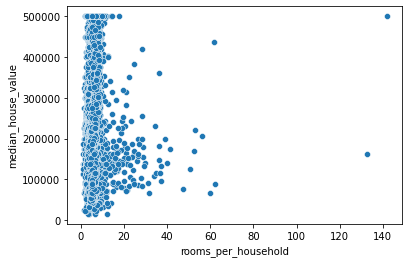

In [34]:
sns.scatterplot(x = 'rooms_per_household',y = 'median_house_value',data = df)
plt.show()

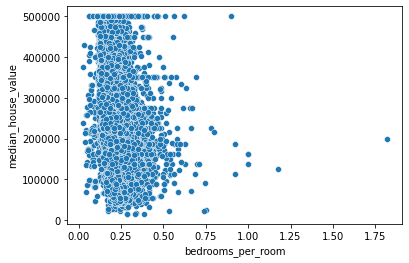

In [35]:
sns.scatterplot(x = 'bedrooms_per_room',y = 'median_house_value',data = df)
plt.show()

### Converting Categorical Variables into dummy

In [36]:
dummy = pd.get_dummies(df['ocean_proximity'],drop_first= True)
df = pd.concat([df,dummy],axis = 1)
df.drop('ocean_proximity',axis=1,inplace=True)

In [37]:
# for features in df:
#     if features != 'longitude': # because it is negative
#         if 0 in df[features].unique(): # because log 0 is infinity
#             pass
#         else:
#             df[features] = np.log(df[features])
        
# df

In [38]:
X = df.drop('median_house_value',axis = 1)
X.drop(columns=['households','total_rooms'],inplace=True)
y = df['median_house_value']

In [39]:
min_max = MinMaxScaler()
X_scaled = min_max.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.5,random_state=0)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [41]:
model.score(X_test,y_test)

0.6430880388395548